In [1]:
import h5py
import numpy as np
import rdrand
import matplotlib.pyplot as plt
plt.ioff()
r = rdrand.RdRandom(rdrand.RdSeedom())

In [2]:
grid_size = 60
grid_refinement = 5
modes = 3
nos = 10000
T_min = 1000.0
T_max = 2000.0
filename = "Temp_profile"

In [3]:
T_data = np.zeros((nos, grid_size*grid_refinement))
x = np.linspace(0, 1, grid_size*grid_refinement)
max_T_data = 0.0

In [4]:
x.shape

(300,)

In [5]:
i = 0
cont_num = 0
while i < nos:
    peak_x_0 = r.uniform(0.1, 0.9)
    peak_variance = r.uniform(0.15, 0.45)
    T_data[i] = T_data[i] + \
        r.uniform(0.3, 1.0)*np.exp(-((x-peak_x_0)**2)/(2*peak_variance**2))


    for j in range(modes-1):
        peak_r = r.uniform(peak_variance**0.5, 1)
        peak_dir = r.uniform(0, 2*np.pi)
        peak_x = peak_x_0+peak_r*np.cos(peak_dir)
        if peak_x >= 0.9:
            peak_x -= 0.8
        elif peak_x <= 0.1:
            peak_x = 0.9-np.abs(0.1-peak_x)
        peak_variance = r.uniform(0.15, 0.45)
        T_data[i] = T_data[i] + \
            r.uniform(0, 1)*np.exp(-((x-peak_x)**2)/(2*peak_variance**2))
    if np.max(T_data[i]) > 1:
        T_data[i] = 0
        continue

    max_T_data = max(max_T_data, np.max(T_data[i]))
    i = i+1    

    
T_data = T_data*(T_max - T_min) + T_min

In [6]:
print(np.sum([np.max(T_data[i]) > 1 for i in range(nos)]))

10000


In [7]:
T_data[r.randint(0,nos-1)].shape

(300,)

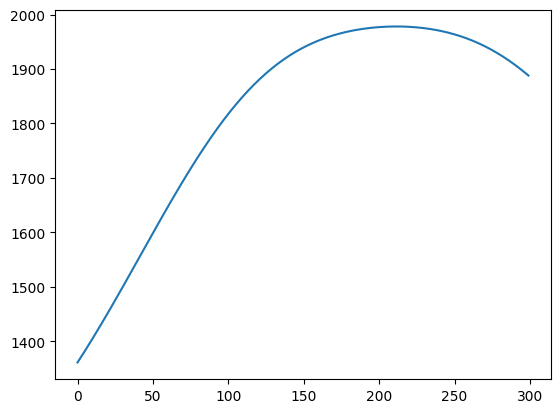

In [8]:
plt.plot(T_data[r.randint(0,nos-1)])
plt.show()

In [9]:
T_data.shape

(10000, 300)

In [10]:
# # %%
# with h5py.File(filename, "w") as f:
#     f.create_dataset("data", data=T_data)
#     f.create_dataset("T_min", data=T_min)
#     f.create_dataset("T_max", data=T_max)

In [11]:
import os 

os.chdir('/home/saumya/Documents/Spec_data/profiles/')

In [12]:
np.save(filename, T_data)